## Plots to compare performance of different optimizers

____

Mikhail Gasanov

In [ ]:
# !git clone https://github.com/EDSEL-skoltech/Intro_to_Digital_Agriculture.git
# %cd ./Intro_to_Digital_Agriculture/Agro_Optimization

In [1]:
%matplotlib inline
import sys, os
import matplotlib
matplotlib.style.use("ggplot")
import matplotlib.pyplot as plt
import pandas as pd
import yaml
import numpy as np
import json 


In [4]:
font = {'family' : 'Sans',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

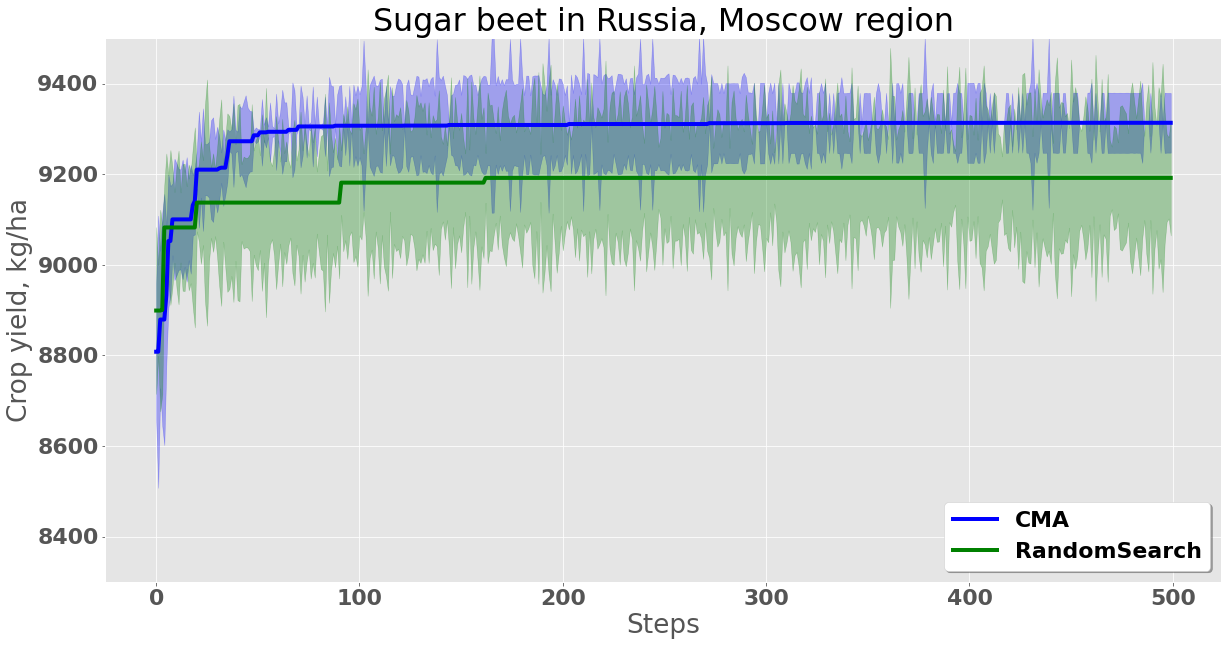

In [5]:

names = ["CMA","RandomSearch"]
dict_for_mean = {}
dict_for_std = {}
for name in names:
    temp_res=[]
    for i in range(10):
        with open('./optim/exp/'+str(name)+'_number_'+str(i)+".json", "r") as mdt:
            res_for_plot=json.load(mdt)
            amalteys=[-res_for_plot[i]['#loss'] for i in range(len(res_for_plot))]
        temp_res.append(amalteys)
    dict_for_mean[str(name)]=np.mean(temp_res, axis=0)
    dict_for_std[str(name)]=np.std(temp_res, axis=0)


from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
colors_list = list(colors.keys())[:6]
colors_list=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

plt.figure(figsize=(20,10))
for index, name in enumerate(names):
    x = np.arange(500)
    y = np.maximum.accumulate(dict_for_mean[name])[:500]
    std = (dict_for_std[name])[:500]
    
    plt.plot(x,y,linewidth=4, color=colors_list[index], label=name)
    plt.fill_between(x, y - 0.5*std, y + 0.5*std,
                     color=colors_list[index], alpha=0.3)
plt.ylim(8300,9500)
plt.title("Sugar beet in Russia, Moscow region")
plt.xlabel('Steps')
plt.ylabel('Crop yield, kg/ha')
plt.legend(frameon=True, shadow=True, facecolor='white',fontsize=22, loc='lower right')
